In [131]:
import torch
import matplotlib.pyplot as plt
import sys
import os
import numpy as np
from itertools import chain
import json

In [132]:
sys.path.append('..')
from benchmark.mnist_classification.model.mlp import Model

In [133]:
global_model = Model()
local_model = Model()

In [134]:
global_path = '../checkpoint/mnist_classification_cnum10_dist2_skew0.7_seed0/global'
local_path = '../checkpoint/mnist_classification_cnum10_dist2_skew0.7_seed0/local'

In [135]:
with open('../fedtask/mnist_classification_cnum10_dist2_skew0.7_seed0/data.json', 'r', encoding='utf-8') as f:
    task_info = json.load(f)

In [136]:
# sample_size = []
# for i in range(10):
#     print(f'Client{i+1} sample size: ', len(task_info[f'Client0{i+1}']['dtrain']))
#     sample_size.append(len(task_info[f'Client0{i+1}']['dtrain']))

In [137]:
# if not os.path.exists('image'):
#     os.makedirs('image', exist_ok=True)
# if not os.path.exists(os.path.join('image','non_iid')):
#     os.makedirs(os.path.join('image','non_iid'), exist_ok=True)

# plot_grad_list = []
# grad_list = []
# for i in range(50):
#     global_model.load_state_dict(torch.load(os.path.join(global_path, f"round{i}/global_model.pt")))
#     for j in range(10):
#         local_model.load_state_dict(torch.load(os.path.join(local_path, f'round{i+1}/client{j}_model.pt')))
        
#         grad_weight = global_model.state_dict()['fc3.weight'] - local_model.state_dict()['fc3.weight']
#         grad_bias = global_model.state_dict()['fc3.bias'] - local_model.state_dict()['fc3.bias']
#         grad_tensor = torch.concat((torch.flatten(grad_weight), torch.flatten(grad_bias)))
#         grad_list.append(grad_tensor)
#     grad_list = [grad.tolist() for grad in grad_list]
#     grad_list = list(chain.from_iterable(grad_list))
#     plot_grad_list.append(grad_list)
#     index = np.arange(2010 * 10)
#     plt.figure(figsize=(20, 10)) 
#     plt.bar(index, grad_list, color='red')
#     plt.title(f"Gradient per client in round {i+1}")
#     # plt.show()
#     plt.savefig(f'image/non_iid/GradAtStep{i}.jpg')
#     grad_list = []
    

In [138]:
import pickle

In [139]:
const_lambda_array = np.zeros([10,])
for i in range(50):
    with open(f'../SV_result/mnist_classification_cnum10_dist2_skew0.7_seed0/const_lambda/Round{i+1}.npy', 'rb') as f:
        const_lambda = pickle.load(f)
        list_const = [itm / pow(i+1, 2) for itm in const_lambda[:-1]]
        const_lambda_array += list_const

In [140]:
opt_lambda_array = np.zeros([10,])
for i in range(50):
    with open(f'../SV_result/mnist_classification_cnum10_dist2_skew0.7_seed0/optimal_lambda/Round{i+1}.npy', 'rb') as f:
        opt_lambda = pickle.load(f)
        list_opt = [itm / pow(i+1,2) for itm in opt_lambda[:-1]]
        opt_lambda_array += list_opt

In [141]:
exact_array = np.zeros([10,])
for i in range(50):
    with open(f'../SV_result/mnist_classification_cnum10_dist2_skew0.7_seed0/exact/Round{i+1}.npy', 'rb') as f:
        exact = pickle.load(f)
        list_exact = [itm / pow(i+1,2) for itm in exact[:-1]]
        exact_array += list_exact

In [142]:
const_lambda_array = const_lambda_array / sum(const_lambda_array)
opt_lambda_array = opt_lambda_array / sum(opt_lambda_array)
exact_array = exact_array / sum(exact_array)

In [143]:
# sample_size = [size / sum(sample_size) for size in sample_size]
# plot_grad_list

In [144]:
# plot_grad_list = np.array(plot_grad_list)
# plot_grad_list.shape

In [145]:
# sum_grad_list = np.zeros((10,))
# for i in range(50):
#     split_array = np.array_split(plot_grad_list[i], 10)
#     sum_list = [sum(abs(item)) for item in split_array]
#     sum_list = [item / pow(i+1,2) for item in sum_list]
#     sum_grad_list += sum_list 
    

In [146]:
exact_array, c_array, opt_array = zip(*sorted(zip(exact_array, const_lambda_array, opt_lambda_array), reverse=True))
c_array

(0.15923109591918624,
 0.13193996757856452,
 0.07416661951787702,
 0.07164012668630877,
 0.07406768881252504,
 0.11481701012438776,
 0.11438136608227575,
 0.09109444341974349,
 0.08762415379721614,
 0.08103752806191518)

In [147]:
# sum_grad_list

In [148]:
# sum_grad_list = sum_grad_list / sum(sum_grad_list)
# sum_grad_list

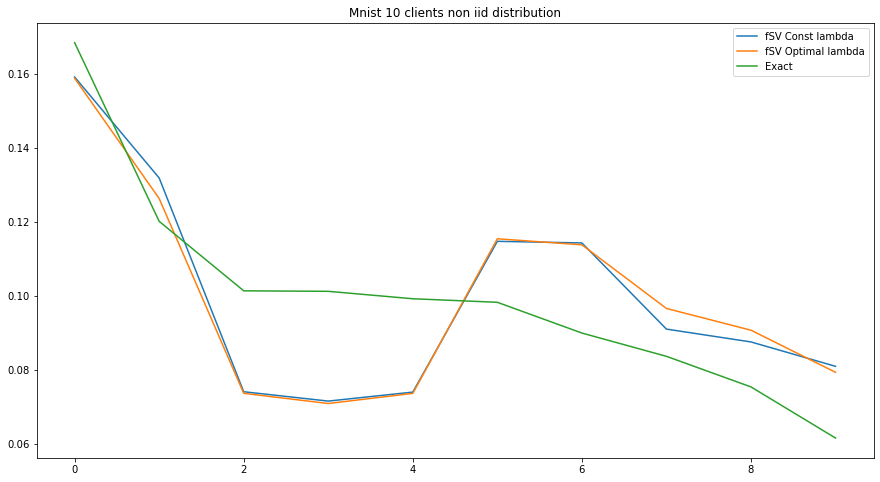

In [149]:
plt.figure(figsize=(15, 8))
plt.plot(c_array, label="fSV Const lambda")
plt.plot(opt_array, label="fSV Optimal lambda")
plt.plot(exact_array, label="Exact")
# plt.plot(sample_size, label='data')
# plt.plot(sum_grad_list, label='grad')
plt.title('Mnist 10 clients non iid distribution')
plt.legend()
plt.show()